In [1]:
# Import the necessary modules
import os
import glob
from plotdata import *

import matplotlib.pyplot as plt
from cmocean import cm
from utils import *

import cartopy.crs as ccrs

In [2]:
# Define the path to the data
os.chdir('Correlations_NC/Temp-Cor/')

In [3]:
# Path of shapefiles
path_shape = '/home/luiz/Documentos/Shapefiles/South_America_ecorreg_diss/'
path_shape_ipcc = '/home/luiz/Documentos/Shapefiles/IPCC_Regions_SA/'

In [4]:
# Get list of files
lista_nc = glob.glob('*.nc')
# Sort list by other list
list_index = ['txx', 'tnx', 'txn', 'tnn', 'dtr', 'wsdi', 'csdi', 'tx90p', 'tn90p', 'tx10p', 'tn10p', 'fd']
lista_nc = [x for x in lista_nc if x.split('_')[0] in list_index]
lista_nc.sort(key=lambda x: list_index.index(x.split('_')[0]))
lista_nc

['txx_COR_NINO34.nc',
 'tnx_COR_NINO34.nc',
 'txn_COR_NINO34.nc',
 'tnn_COR_NINO34.nc',
 'dtr_COR_NINO34.nc',
 'wsdi_COR_NINO34.nc',
 'csdi_COR_NINO34.nc',
 'tx90p_COR_NINO34.nc',
 'tn90p_COR_NINO34.nc',
 'tx10p_COR_NINO34.nc',
 'tn10p_COR_NINO34.nc',
 'fd_COR_NINO34.nc']

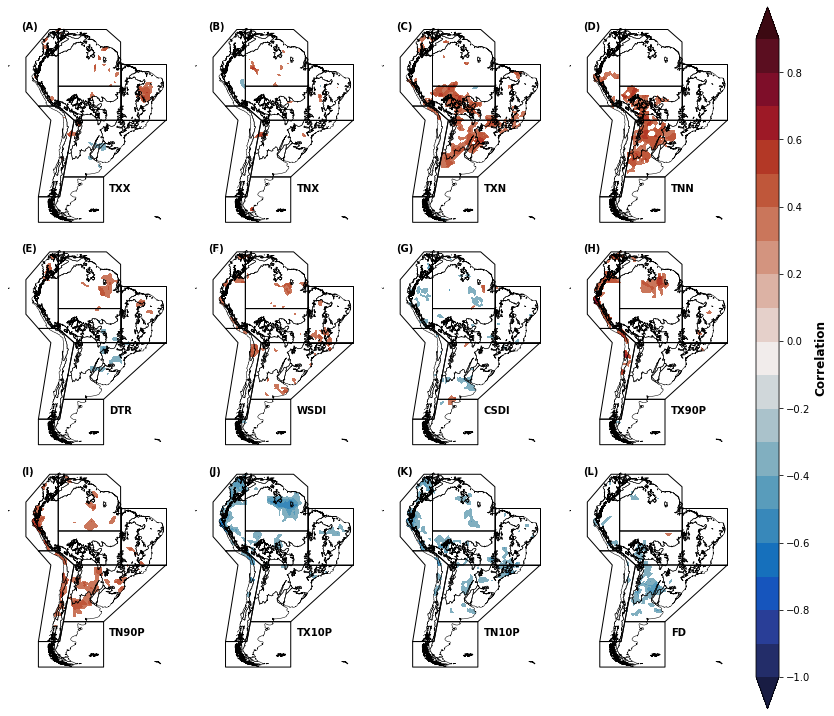

In [6]:
# Define Global variables

# Set the projection
proj = ccrs.PlateCarree()
# pallete
cmap = cm.balance
# Define levels
levels = np.arange(-1., 1., 0.1)
# List with the names of the variables
index_name = [name.upper().split('_')[0] for name in lista_nc]
# row and cols
nrows=3
ncols=4
ABC = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

# Create the figure
fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                       subplot_kw={'projection':proj},
                       figsize=[16.,15])
# axs this is array of GeoAxes bidimensional.
# Use flatten to get a 1D array
axs=axs.flatten()

# Loop
for index, index_ax, abc in zip(lista_nc, np.arange(len(lista_nc)), ABC):
    # Open dataset
    ds = xr.open_dataset(index)
    # Get the data
    cor = ds['cor']
    sig = ds['sig']
    # Create array with data lon and lat
    lons, lats = np.meshgrid(cor.lon, cor.lat)
    alpha = 0.05 # 
    sig_area = np.where(sig < alpha) # Define level of significance
    
    #  Plot
    cs = cor.where(sig <= alpha).plot.contourf(ax=axs[index_ax],
                                                transform=proj,
                                                cmap=cmap,
                                                levels=levels,
                                                extend='both',
                                                add_colorbar=False)


   # Plot map
    create_maps(axs[index_ax], shape=True, shapefile=path_shape)
    axs[index_ax].axis('off')

    # Text
    axs[index_ax].text(x=-54,y=-45., s=index_name[index_ax], fontdict={'fontweight':'bold', 'fontsize':10})
    axs[index_ax].text(x=-85,y=12., s='('+abc.upper()+')', fontdict={'fontweight':'bold', 'fontsize':10})

    # Background
    plot_shapefile(axs[index_ax], shapefile=path_shape_ipcc)

fig.subplots_adjust(right=0.76,hspace=-0.4, wspace=0.10) #hspace=0.05 hspace=0.15

# Add the colorbar
cbar_ax = fig.add_axes([0.775,0.17,0.02,0.65]) # Vertical
# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.set_label(label='Correlation', size='large', weight='bold')
cbar.ax.tick_params(labelsize='medium')

# Facecolor white
fig.patch.set_facecolor('white')

plt.savefig('Correlations-Temp-NINO34.png', dpi=600, bbox_inches='tight', facecolor='white')